# Milestone 1
Team: Sivatagi Rohamcsigák

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import random
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Reading the data

In [2]:
# Labels
traindf = pd.read_csv("../input/landmark-recognition-2021/train.csv")
traindf.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [4]:
# Length of the training labels
print("Total unique label ids:", len(traindf['landmark_id'].unique()))

Total unique label ids: 81313


In [5]:
landmark_unique = traindf['landmark_id'].unique()
len(landmark_unique)

81313

In [6]:
image_ids = []
labels = []
temp_labels = []
i=0
for id_ in landmark_unique[0:50]:
    for iid in traindf['id'][traindf['landmark_id'] == id_]:
        image_ids.append(iid)
        labels.append(id_)
        temp_labels.append(i)
    i = i+1
len(image_ids)

1144

In [8]:
mainpath = '../input/landmark-recognition-2021/train'
image_path = []
images_pixels = []

for i in range(0,len(image_ids)):
    first_dir = os.path.join(mainpath,image_ids[i][0])
    second_dir = os.path.join(first_dir,image_ids[i][1])
    third_dir = os.path.join(second_dir,image_ids[i][2])
    finalpath = os.path.join(third_dir,image_ids[i]+'.jpg')
    
    img_pix = cv2.imread(finalpath,1)
    images_pixels.append(cv2.resize(img_pix, (100,100)))
    
    image_path.append(finalpath)

In [9]:
print('Images: ', len(image_path))
print('Image labels: ', len(labels))

Images:  1144
Image labels:  1144


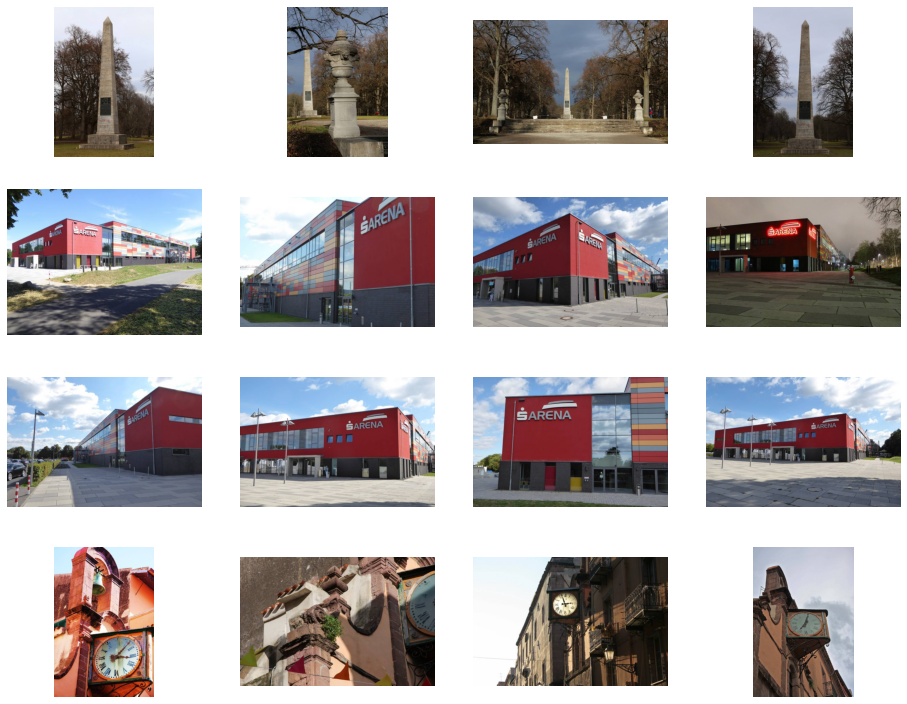

In [10]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

next_pix_ = image_path

for i, img_path in enumerate(next_pix_[0:16]):
    
    sp = plt.subplot(5, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

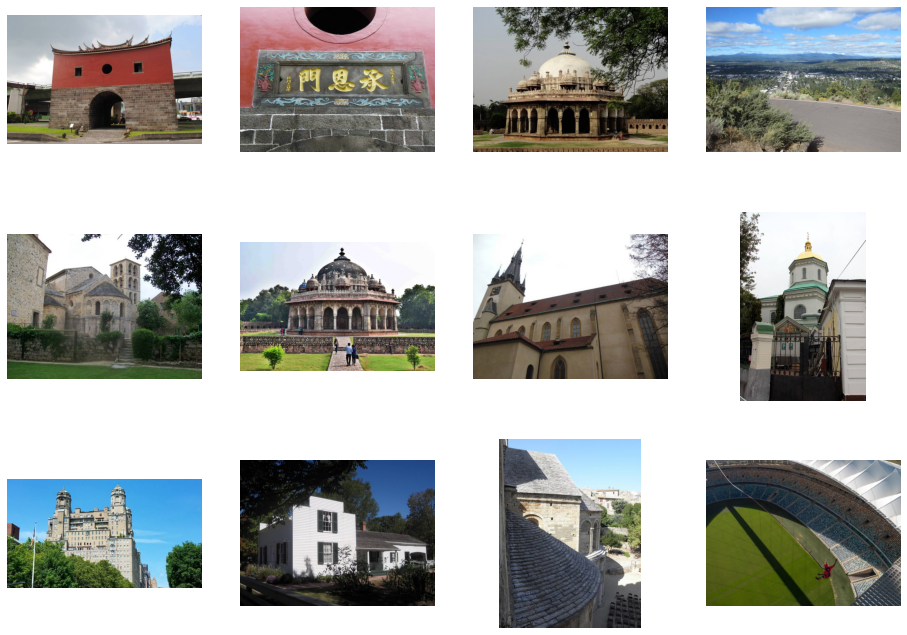

In [11]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
next_pix = image_path
random.shuffle(next_pix)
for i, img_path in enumerate(next_pix[0:12]):
    
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [12]:
shuf = list(zip(images_pixels,temp_labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)
print('Images: ', len(train_data))
print('Image labels: ', len(labels_data))

Images:  1144
Image labels:  1144


In [13]:
X_data = np.array(train_data) / 255
Y_data =  to_categorical(labels_data, num_classes = 50) 

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.3, random_state=101)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y val data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  800
X label data :  344
Y test data :  800
Y label data :  344


In [17]:
datagen = ImageDataGenerator(horizontal_flip=False,
                             vertical_flip=False,
                             rotation_range=0,
                             zoom_range=0.2,
                             width_shift_range=0,
                             height_shift_range=0,
                             shear_range=0,
                             fill_mode="nearest")